In [1]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
#Import Dataset 
df_books = pd.read_csv("D:\\TJ\\MACHINELEARNING\\BookRecommendation\\datasets\\books_data.csv");

In [3]:
df_rating = pd.read_csv("D:\\TJ\\MACHINELEARNING\\BookRecommendation\\datasets\\Books_rating.csv");

In [4]:
df_books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,1/1/2005,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,3/1/2003,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [5]:
df_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [6]:
books_data = pd.merge(df_books,df_rating)

In [7]:
books_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999778 entries, 0 to 2999777
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Title               object 
 1   description         object 
 2   authors             object 
 3   image               object 
 4   previewLink         object 
 5   publisher           object 
 6   publishedDate       object 
 7   infoLink            object 
 8   categories          object 
 9   ratingsCount        float64
 10  Id                  object 
 11  Price               float64
 12  User_id             object 
 13  profileName         object 
 14  review/helpfulness  object 
 15  review/score        float64
 16  review/time         int64  
 17  review/summary      object 
 18  review/text         object 
dtypes: float64(3), int64(1), object(15)
memory usage: 457.7+ MB


In [8]:
books_data.describe()

,ratingsCount,Price,review/score,review/time
count,1.639140e+06,481169.000000,2.999778e+06,2.999778e+06
mean,2.720916e+02,21.762676,4.215318e+00,1.132311e+09
std,7.888075e+02,26.206593,1.203030e+00,1.493226e+08
min,1.000000e+00,1.000000,1.000000e+00,-1.000000e+00
25%,3.000000e+00,10.780000,4.000000e+00,9.999072e+08
50%,1.000000e+01,14.930000,5.000000e+00,1.128298e+09
75%,5.500000e+01,23.950000,5.000000e+00,1.269130e+09
max,4.895000e+03,995.000000,5.000000e+00,1.362355e+09


In [9]:
#Drop Rows with missing values 
books_data=books_data.dropna()

In [10]:
#Since Dataset is huge , Sampling dataset with 4% data
books_data_sample = books_data.sample(frac=.1,random_state=1)
books_data_sample.shape

(17430, 19)

In [11]:
books_data_sample.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
638858,Candide,From the landscapes of El Dorado to Constantin...,['Voltaire'],http://books.google.com/books/content?id=45_au...,http://books.google.com/books?id=45_auwqrT9kC&...,ReadHowYouWant.com,2006,https://play.google.com/store/books/details?id...,['Fiction'],2687.0,0939495600,25.00,A1U8DHSI18EEJ1,Richard E. Noble,1/2,5.0,1266364800,The Hobo Philosopher,Voltare worte this play in response to Leibniz...
1964867,The Art of Intrusion: The Real Stories Behind ...,Hacker extraordinaire Kevin Mitnick delivers t...,"['Kevin D. Mitnick', 'William L. Simon']",http://books.google.com/books/content?id=12_GL...,http://books.google.nl/books?id=12_GLOhw5oEC&p...,John Wiley & Sons,3/17/2009,https://play.google.com/store/books/details?id...,['Computers'],12.0,B000MV89V4,3.39,AVISOVCTFJG29,Alejandro Odreman,0/2,5.0,1215043200,It's just excellent,Adequate for noobs and pros to understand how ...
512696,To Trust a Stranger,Karen Robards once again electrifes the page w...,['Karen Robards'],http://books.google.com/books/content?id=AAfMi...,http://books.google.com/books?id=AAfMi3YTq90C&...,Simon and Schuster,2/5/2002,https://play.google.com/store/books/details?id...,['Fiction'],2.0,0743466284,31.95,A3MUDAYXE0ANVM,"Christy T. French ""author""",1/2,5.0,1009411200,A Real Sizzler!,I have to say it - Wow! First book I read by M...
1817502,Journalistic Fraud: How The New York Times Dis...,"For over a hundred years, the New York Times h...",['Bob Kohn'],http://books.google.com/books/content?id=1zHhs...,http://books.google.nl/books?id=1zHhsTPrN6sC&p...,Thomas Nelson Inc,8/14/2003,http://books.google.nl/books?id=1zHhsTPrN6sC&d...,['Political Science'],1.0,B000685KVK,10.40,A1PIQ3KQZ3BQFS,John Mashey,33/36,4.0,1065398400,Another inoculation against media distortion,Kohn describes well-known techniques of unobje...
796809,A Lesson Before Dying (Library Edition Audio C...,NATIONAL BOOK CRITICS CIRCLE AWARD WINNER • A ...,['Ernest J. Gaines'],http://books.google.com/books/content?id=cV-gT...,http://books.google.com/books?id=cV-gTPZVm8wC&...,Vintage,1/20/2004,https://play.google.com/store/books/details?id...,['Fiction'],24.0,1580812287,25.95,A39U6ANNVLPJTF,"""lookalike""",2/3,4.0,974160000,I understand what Oprah saw in this book.,This book has so many good aspects to it. It d...


In [12]:
books_data_pivoted = books_data_sample.pivot_table(index='Title',values='review/score', aggfunc='mean').fillna(0)
books_data_pivoted


,review/score
Title,
"""Forget Not Love"": The Passion of Maximilian Kolbe",5.0
"""Happiness Is Not My Companion"": The Life of General G. K. Warren",5.0
"""Mom, Dad . . . I'm Pregnant"": When Your Daughter or Son Faces an Unplanned Pregnancy (TH1NK LifeChange)",5.0
"""Mom, I Hate My Life!"": Becoming Your Daughter's Ally Through the Emotional Ups and Downs of Adolescence (A Hand-in-Hand Book)",3.0
"""The Super Short, Amazing Story of David & Goliath""",5.0
...,...
Zondervan's Compact Bible Dictionary,5.0
Zoo - ology,5.0
bills open kitchen,4.0


In [13]:
#Split The test and train data 60 train and 40 test
books_data_train, books_data_test = train_test_split(books_data_pivoted, test_size=0.2, random_state=42) 
books_data_train

,review/score
Title,
"Hello, It's Me (Warner Forever)",4.000000
Women and the Genesis of Christianity,5.000000
The Believer's Authority,4.750000
Snowblind,4.000000
The Night Before Thanksgiving (Reading Railroad Books),4.500000
...,...
Baghdad Burning II: More Girl Blog from Iraq (Women Writing the Middle East),5.000000
Remote Control,4.714286
The Case for Easter: Journalist Investigates the Evidence for the Resurrection,4.000000


In [14]:
books_data_test

,review/score
Title,
Talking In The Dark (Push Poetry),5.000000
A Breath of Snow and Ashes (Outlander),4.245283
To Trust a Stranger,4.600000
The Rhyming Season,5.000000
The New White Nationalism in America: Its Challenge to Integration,4.500000
...,...
A Practical Guide to Collecting Civil War,5.000000
Drawing Landscapes in Pencil (Practical Art Books),5.000000
Controversial Essays (HOOVER INST PRESS PUBLICATION),3.000000


(array([ 104.,   16.,  118.,   45.,   48.,  330.,  226.,  734.,  544.,
        1990.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

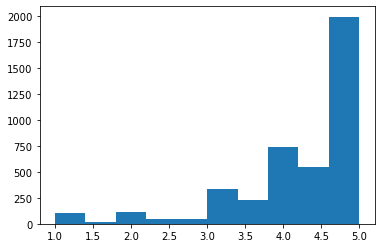

In [15]:
plt.hist(books_data_train['review/score'].to_numpy())

In [16]:
#Build NN Model
from sklearn.neighbors import NearestNeighbors

# Build NearestNeighbors Object
model_nn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=30, n_jobs=-1)

# Fit the NearestNeighbor
model_nn.fit(books_data_train['review/score'].to_numpy().reshape(-1, 1))

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=30)

In [17]:
# Get top 10 nearest neighbors based on rating or review/score
print(books_data_test.iloc[2])
indices=model_nn.kneighbors(books_data_test.iloc[[2]], 10, return_distance=False)
print(indices)

# Print the recommended books
print("Recommended Books:")
print("==================")
for i in range(0, len(indices[0])):
    print((i+1),". ",books_data_train.iloc[indices[0][i]])

review/score    4.6
Name: To Trust a Stranger, dtype: float64
[[2768 2767 2773 2772 2771 2770 2769 2775 2764 2763]]
Recommended Books:
1 .  review/score    4.461538
Name: Black Cross, dtype: float64
2 .  review/score    3.0
Name: Dixie Betrayed: How the South Really Lost the Civil War, dtype: float64
3 .  review/score    5.0
Name: Soul Survival, dtype: float64
4 .  review/score    5.0
Name: Heartthrob, dtype: float64
5 .  review/score    5.0
Name: Racso and the Rats of NIMH, dtype: float64
6 .  review/score    5.0
Name: Chasing the Wind: The Autobiography of Steve Fossett, dtype: float64
7 .  review/score    3.571429
Name: Crocheting For Dummies (For Dummies (Sports & Hobbies)), dtype: float64
8 .  review/score    4.5
Name: BITCHfest: Ten Years of Cultural Criticism from the Pages of Bitch Magazine, dtype: float64
9 .  review/score    5.0
Name: Lost and Found: A Daughter's Tale of Violence and Redemption, dtype: float64
10 .  review/score    3.0
Name: The Family Trade (Merchant Princes

D:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but NearestNeighbors was fitted without feature names
  warnings.warn(


In [18]:
kmeans = KMeans(n_clusters=7, random_state=0)
cluster_labels = kmeans.fit_predict(books_data_train['review/score'].to_numpy().reshape(-1, 1))

In [19]:
print(books_data_test.iloc[2])
predictedLabel = kmeans.predict(books_data_test.iloc[2]['review/score'].reshape(-1, 1))
predictedLabel[0]
predictedBookIndices = np.where(kmeans.labels_ == predictedLabel[0])
print("Recommended Books:")
print("==================")
for i in range(0, 10):
    print((i+1),". ",books_data_train.iloc[predictedBookIndices[0][i]])

review/score    4.6
Name: To Trust a Stranger, dtype: float64
Recommended Books:
1 .  review/score    4.75
Name: The Believer's Authority, dtype: float64
2 .  review/score    4.5
Name: The Night Before Thanksgiving (Reading Railroad Books), dtype: float64
3 .  review/score    4.5
Name: Agape Leadership, dtype: float64
4 .  review/score    4.333333
Name: Iceman: Uncovering the Life and Times of a Prehistoric Man Found in an Alpine Glacier, dtype: float64
5 .  review/score    4.5
Name: Power Mentoring: How Successful Mentors and Proteges Get the Most Out of Their Relationships, dtype: float64
6 .  review/score    4.333333
Name: When Am I Going to Be Happy?: How to Break the Emotional Bad Habits That Make You Miserable, dtype: float64
7 .  review/score    4.333333
Name: Invisible Darkness: The Strange Case Of Paul Bernardo and Karla Homolka, dtype: float64
8 .  review/score    4.333333
Name: Villa and Zapata: A History of the Mexican Revolution, dtype: float64
9 .  review/score    4.5
Nam

In [20]:
from sklearn import metrics
silhouette = metrics.silhouette_score(books_data_train['review/score'].to_numpy().reshape(-1, 1), cluster_labels)
dunn = metrics.davies_bouldin_score(books_data_train['review/score'].to_numpy().reshape(-1, 1), cluster_labels)
chs = metrics.calinski_harabasz_score(books_data_train['review/score'].to_numpy().reshape(-1, 1), cluster_labels)
print("kMeans: silhouette: ", silhouette, ", dunn: ", dunn, ", chs: ", chs)

kMeans: silhouette:  0.8168792741971586 , dunn:  0.3108354698054419 , chs:  63944.163595452344


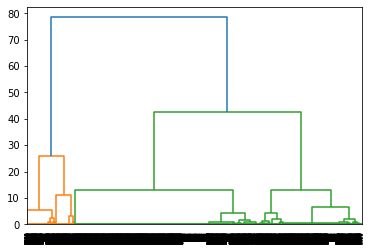

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot as plt
dend = shc.dendrogram(shc.linkage(books_data_pivoted['review/score'].to_numpy().reshape(-1, 1), method = 'ward'))


In [22]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
predictedLabelAgglomerative = cluster.fit_predict(books_data_pivoted['review/score'].to_numpy().reshape(-1, 1))

In [23]:
silhouette_agglomerative = metrics.silhouette_score(books_data_pivoted['review/score'].to_numpy().reshape(-1, 1), predictedLabelAgglomerative)
dunn_aglomerative = metrics.davies_bouldin_score(books_data_pivoted['review/score'].to_numpy().reshape(-1, 1), predictedLabelAgglomerative)
chs_aglomerative = metrics.calinski_harabasz_score(books_data_pivoted['review/score'].to_numpy().reshape(-1, 1), predictedLabelAgglomerative)
print("Agglomerative: silhouette: ", silhouette_agglomerative, ", dunn: ", dunn_aglomerative, ", chs: ", chs_aglomerative)

Agglomerative: silhouette:  0.7068613498598997 , dunn:  0.4611718233585004 , chs:  26257.658948857123


In [24]:
books_data_cluster = books_data_pivoted.copy()
books_data_cluster['Cluster'] = predictedLabelAgglomerative

In [25]:
book = books_data_cluster.iloc[10]
print(book)

cluster = book['Cluster']
predictedBookIndicesAgglomerative = np.where(predictedLabelAgglomerative == cluster)
print("Recommended Books:")
print("==================")
for i in range(0, 10):
    print((i+1),". ",books_data_cluster.iloc[predictedBookIndicesAgglomerative[0][i]])

review/score    4.0
Cluster         2.0
Name: 1 Corinthians (The NIV Application Commentary), dtype: float64
Recommended Books:
1 .  review/score    4.0
Cluster         2.0
Name: 1 Corinthians (The NIV Application Commentary), dtype: float64
2 .  review/score    4.2
Cluster         2.0
Name: 1001 Books You Must Read Before You Die, dtype: float64
3 .  review/score    4.0
Cluster         2.0
Name: 101 Questions & Answers on the Four Last Things (Responses to 101 Questions), dtype: float64
4 .  review/score    4.0
Cluster         2.0
Name: 101 Things to Do with a Tortilla, dtype: float64
5 .  review/score    4.0
Cluster         2.0
Name: 180 More: Extraordinary Poems for Every Day, dtype: float64
6 .  review/score    4.0
Cluster         2.0
Name: 1898: The Birth of the American Century, dtype: float64
7 .  review/score    4.0
Cluster         2.0
Name: 19 Gifts of the Spirit, dtype: float64
8 .  review/score    4.0
Cluster         2.0
Name: 2005 Novel & Short Story Writer's Market, dtype:

In [94]:
x = sorted(set(books_data_sample['categories']))
genre_by_id = dict([(y,x+1) for x,y in enumerate(x)])
id_by_genre = dict([(x+1, y) for x,y in enumerate(x)])

                                                    categories
Title                                                         
"Forget Not Love": The Passion of Maximilian Kolbe         129
"Happiness Is Not My Companion": The Life of Ge...          97
"Mom, Dad . . . I'm Pregnant": When Your Daught...         129
"Mom, I Hate My Life!": Becoming Your Daughter'...          81
"The Super Short, Amazing Story of David & Goli...         127
...                                                        ...
Zondervan's Compact Bible Dictionary                        31
Zoo - ology                                                104
bills open kitchen                                          58
comeback - a mother and daughter's journey thro...          33
sendmail Desktop Reference (Pocket Reference)               54

[5194 rows x 1 columns]


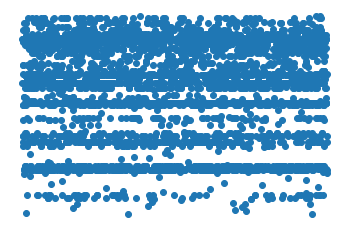

In [82]:
books_genre_pivoted = books_data_sample.pivot_table(index='Title',values='categories', aggfunc='first').fillna(0)
books_genre_pivoted['categories'] = books_genre_pivoted.categories.replace(genre_by_id) 
print(books_genre_pivoted)
books_author_pivoted = books_data_sample.pivot_table(index='Title',values='authors', aggfunc='first').fillna(0)
books_genre_author_pivoted = books_author_pivoted.merge(books_genre_pivoted, on='Title')
plt.axis('off')
plt.scatter(books_genre_author_pivoted['authors'], books_genre_author_pivoted['categories'])

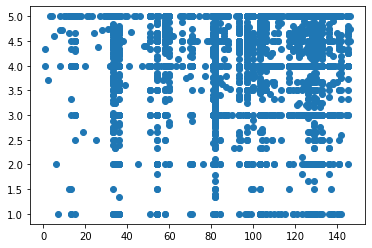

In [83]:
books_genre_rating_pivoted = books_data_pivoted.merge(books_genre_pivoted, on='Title')
books_genre_rating_pivoted.head()
plt.scatter(books_genre_rating_pivoted['categories'], books_genre_rating_pivoted['review/score'])

In [84]:
genre_rating_train, genre_rating_test = train_test_split(books_genre_rating_pivoted, test_size=0.2, random_state=42)

In [85]:
kmeans_train_data = np.reshape(genre_rating_train.to_numpy(), (-1, 2))

In [86]:
kmeans_genre_rating = KMeans(n_clusters=7, random_state=0)
cluster_labels = kmeans.fit_predict(kmeans_train_data)

In [114]:
book = genre_rating_test.iloc[90]
print(book.name, ", Score: ", book['review/score'], ", Category: ", id_by_genre.get(book['categories']))

predictedCluster = kmeans.predict(np.reshape(book.to_numpy(), (-1, 2)))
predictedBookIndices = np.where(cluster_labels == predictedCluster)
print("Recommended Books:")
print("==================")
for i in range(0, 10):
    book = genre_rating_train.iloc[predictedBookIndices[0][i]]
    print((i+1),". ")
    print(book.name, ", Score: ", book['review/score'], ", Category: ", id_by_genre.get(book['categories']))

A Jealous God: Science's Crusade Against Religion , Score:  5.0 , Category:  ['Political Science']
Recommended Books:
1 . 
Women and the Genesis of Christianity , Score:  5.0 , Category:  ['Religion']
2 . 
Putting On a Gentle And Quiet Spirit: 1 Peter (A Woman After God's Own Heart) , Score:  4.0 , Category:  ['Religion']
3 . 
Who's Looking Out for You? , Score:  3.3333333333333335 , Category:  ['Political Science']
4 . 
Iceman: Uncovering the Life and Times of a Prehistoric Man Found in an Alpine Glacier , Score:  4.333333333333333 , Category:  ['Social Science']
5 . 
When Am I Going to Be Happy?: How to Break the Emotional Bad Habits That Make You Miserable , Score:  4.333333333333333 , Category:  ['Psychology']
6 . 
Invisible Darkness: The Strange Case Of Paul Bernardo and Karla Homolka , Score:  4.333333333333333 , Category:  ['True Crime']
7 . 
Television Fundamentals , Score:  4.0 , Category:  ['Technology']
8 . 
Ancient Near Eastern Thought and the Old Testament: Introducing the

In [93]:
silhouette = metrics.silhouette_score(kmeans_train_data, cluster_labels)
dunn = metrics.davies_bouldin_score(kmeans_train_data, cluster_labels)
chs = metrics.calinski_harabasz_score(kmeans_train_data, cluster_labels)
print("kMeans rating and genre: silhouette: ", silhouette, ", dunn: ", dunn, ", chs: ", chs)

kMeans rating and genre: silhouette:  0.722999844463289 , dunn:  0.36457193998994725 , chs:  48531.41796987763
